#1.Overview

Link download data: https://drive.google.com/file/d/1ktOaXYW3TWKNj-t1xJugxj-o9MQouEu2/view?usp=sharing

This project explores publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). This project aims to create a model to show profiles of borrowers with a high probability of paying back this loan. The columns in the dataset represent the following:

- credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
- int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
- installment: The monthly installments owed by the borrower if the loan is funded.
- log.annual.inc: The natural log of the self-reported annual income of the borrower.
- dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
- fico: The FICO credit score of the borrower.
- days.with.cr.line: The number of days the borrower has had a credit line.
- revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
- revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
- delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
- not_fully_paid: information relating to whether loan was repaid or not (1: repaid fully; 0: not repaid fully)

#2.Importing required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("fivethirtyeight")
sns.set_context("notebook")

In [ ]:
!pip install imbalanced-learn
!pip install matplotlib-venn
from imblearn.over_sampling import SMOTE

#3.Load data and check data

In [ ]:
# For loading data, let's replace dataset with your actual dataset file and file path
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df_loan = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/DA2204/Final project/loan_data.csv')
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37066 entries, 0 to 37065
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      37066 non-null  int64  
 1   purpose            37066 non-null  object 
 2   int_rate           37066 non-null  float64
 3   installment        37066 non-null  float64
 4   log_annual_inc     37066 non-null  float64
 5   dti                36966 non-null  float64
 6   fico               37066 non-null  int64  
 7   days_with_cr_line  37066 non-null  int64  
 8   revol_bal          37066 non-null  int64  
 9   revol_util         37054 non-null  float64
 10  inq_last_6mths     37066 non-null  int64  
 11  delinq_2yrs        37032 non-null  float64
 12  pub_rec            37066 non-null  int64  
 13  not_fully_paid     37066 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 4.0+ MB


#4.EDA

##Check structure of the data

In [ ]:
# Check structure of the data:
df_loan.info(verbose = True,null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37066 entries, 0 to 37065
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      37066 non-null  int64  
 1   purpose            37066 non-null  object 
 2   int_rate           37066 non-null  float64
 3   installment        37066 non-null  float64
 4   log_annual_inc     37066 non-null  float64
 5   dti                36966 non-null  float64
 6   fico               37066 non-null  int64  
 7   days_with_cr_line  37066 non-null  int64  
 8   revol_bal          37066 non-null  int64  
 9   revol_util         37054 non-null  float64
 10  inq_last_6mths     37066 non-null  int64  
 11  delinq_2yrs        37032 non-null  float64
 12  pub_rec            37066 non-null  int64  
 13  not_fully_paid     37066 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 4.0+ MB


<ipython-input-5-096b6da9a838>:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_loan.info(verbose = True,null_counts = True)


We do not see any columns with Nullable values.

In [ ]:
# Get statistical summary:
df_loan.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
credit_policy,37066.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
purpose,37066,12,debt_consolidation,19595,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,37066.0,NaN,NaN,NaN,0.125959,0.048869,0.053,0.085,0.117,0.156,0.308
installment,37066.0,NaN,NaN,NaN,461.676085,286.609282,30.51,248.71,383.07,627.47,1671.88
log_annual_inc,37066.0,NaN,NaN,NaN,85081.808358,91522.863617,0.0,50000.0,70000.0,100000.0,9300000.0
dti,36966.0,NaN,NaN,NaN,19.906781,17.405359,0.0,11.91,18.27,25.49,999.0
fico,37066.0,NaN,NaN,NaN,713.174095,36.889934,664.0,684.0,704.0,734.0,850.0
days_with_cr_line,37066.0,NaN,NaN,NaN,37601.141855,2826.487211,22251.0,36251.0,38169.0,39356.0,42795.0
revol_bal,37066.0,NaN,NaN,NaN,5257.108051,15219.806597,0.0,0.0,1.0,1743.25,504828.0
revol_util,37054.0,NaN,NaN,NaN,0.281656,0.664489,0.0,0.0,0.0,0.377,23.0


**Observations:**
- There are 13 columns with numeric variables and only 1 categorical variable.
- The "credit policy" column should be deleted for modelling due to 100% of variables is 1.
- Missing value at "dti", "revol_util", "delinq-2yrs" columns.
- Variables are not on same scale.

In [ ]:
# Check for NaN record:
df_loan[df_loan.isna().any(axis=1)]

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
251,1,credit_card,0.143,1201.33,0.0,NaN,679,42156,16858,0.371,1,0.000,2,1
1554,1,credit_card,0.088,826.66,0.0,NaN,709,38353,47472,0.682,1,0.000,0,0
1805,1,debt_consolidation,0.124,167.03,38000.0,5.56,689,39052,0,NaN,0,0.000,0,0
2226,1,home_improvement,0.082,814.70,120000.0,9.25,764,37987,0,NaN,0,0.000,0,0
2345,1,debt_consolidation,0.131,797.80,0.0,NaN,814,37316,97,0.016,0,0.000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35967,1,house,0.082,1256.97,0.0,NaN,709,31686,0,0.000,278568,0.544,0,1
35969,1,home_improvement,0.139,928.66,1.0,NaN,709,33848,0,0.000,1648,0.323,0,1
36356,1,debt_consolidation,0.250,59.64,60000.0,9.40,719,39234,0,0.000,0,NaN,0,1
36503,1,credit_card,0.065,1225.24,0.0,NaN,739,30864,0,0.000,55481,0.937,0,1


There are only 146 rows with NaN record, immaterial compared with total row (37066) => delete these rows.

In [ ]:
# Drop all NaN rows
df_loan.dropna(inplace=True)

In [ ]:
# Way1: Check for nan record:
df_loan[df_loan.isna().any(axis=1)]

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid


In [ ]:
# Way2: Computing count and percentage of missing values:
null_count = df_loan.isnull().sum()
null_percentage = round((df_loan.isnull().sum()/df_loan.shape[0])*100, 2)
null_df = pd.DataFrame({'column_name' : df_loan.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)
null_df.sort_values(by = 'null_percentage', ascending = False)

,column_name,null_count,null_percentage
0,credit_policy,0,0.0
1,purpose,0,0.0
2,int_rate,0,0.0
3,installment,0,0.0
4,log_annual_inc,0,0.0
5,dti,0,0.0
6,fico,0,0.0
7,days_with_cr_line,0,0.0
8,revol_bal,0,0.0
9,revol_util,0,0.0


1    26775
0    10145
Name: not_fully_paid, dtype: int64


<Axes: >

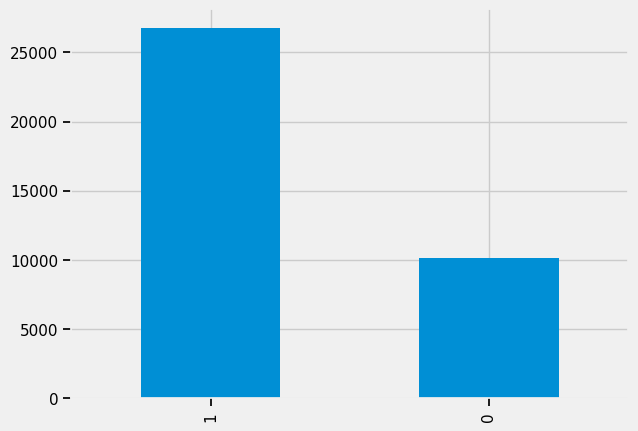

In [ ]:
# Checking imbalanced data for target column "not_fully_paid":
print(df_loan["not_fully_paid"].value_counts())
df_loan["not_fully_paid"].value_counts().plot(kind="bar")

#5.Data preprocessing

## Handle categorical column

In [ ]:
# Determine categorical column:
df_loan.select_dtypes(include = "object").columns

Index(['purpose'], dtype='object')

In [ ]:
# Get quick statistic from categorical column:
df_loan['purpose'].value_counts()

debt_consolidation    19516
credit_card            9087
home_improvement       2836
other                  2496
major_purchase          899
medical                 465
house                   406
car                     384
vacation                313
small_business          269
moving                  234
renewable_energy         15
Name: purpose, dtype: int64

**Observation:**
- Debt-consolidation is accounted for as the highest portion, and
- There are too many variables thus there are also many columns created by onehot encoding method accordingly.

=> Grouping:
debt_cons:1,
the others:0


In [ ]:
# Grouping:
def process_purpose(x):
  if x == "debt_consolidation":
    return 1
  else:
    return 0

df_loan['purpose_int'] = df_loan['purpose'].apply(process_purpose)
df_loan['purpose_int'].value_counts()

1    19516
0    17404
Name: purpose_int, dtype: int64

In [ ]:
# Drop "purpose" column after creating new column:
df_loan.drop(columns=["purpose"], inplace=True)
df_loan

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_int
0,1,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.000,0,0,0
1,1,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.000,0,0,0
2,1,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.000,0,0,0
3,1,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.000,0,0,0
4,1,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37061,1,0.088,792.79,167000.0,24.66,694,37895,0,0.000,25987,0.680,0,1,1
37062,1,0.103,856.40,125000.0,11.73,744,31444,0,0.000,1728,0.033,0,1,1
37063,1,0.180,837.45,75000.0,9.02,694,40878,3,0.000,636,0.038,0,1,0
37064,1,0.110,458.48,32072.0,58.12,779,39539,0,0.000,15016,0.289,0,1,1


In [ ]:
# Drop "credit_policy" column:
df_loan["credit_policy"].value_counts()
df_loan.drop(columns=["credit_policy"], inplace=True)
df_loan

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_int
0,0.143,498.35,150000.0,15.70,694,37865,19748,0.674,3,5.000,0,0,0
1,0.110,870.29,55000.0,30.13,734,35947,11898,0.476,2,1.000,0,0,0
2,0.088,785.32,165000.0,16.11,694,36373,20681,0.567,0,0.000,0,0,0
3,0.170,285.03,40000.0,32.07,744,40269,8514,0.226,2,0.000,0,0,0
4,0.088,570.81,36000.0,23.73,714,38565,7555,0.256,1,0.000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37061,0.088,792.79,167000.0,24.66,694,37895,0,0.000,25987,0.680,0,1,1
37062,0.103,856.40,125000.0,11.73,744,31444,0,0.000,1728,0.033,0,1,1
37063,0.180,837.45,75000.0,9.02,694,40878,3,0.000,636,0.038,0,1,0
37064,0.110,458.48,32072.0,58.12,779,39539,0,0.000,15016,0.289,0,1,1


## Correlation analysis

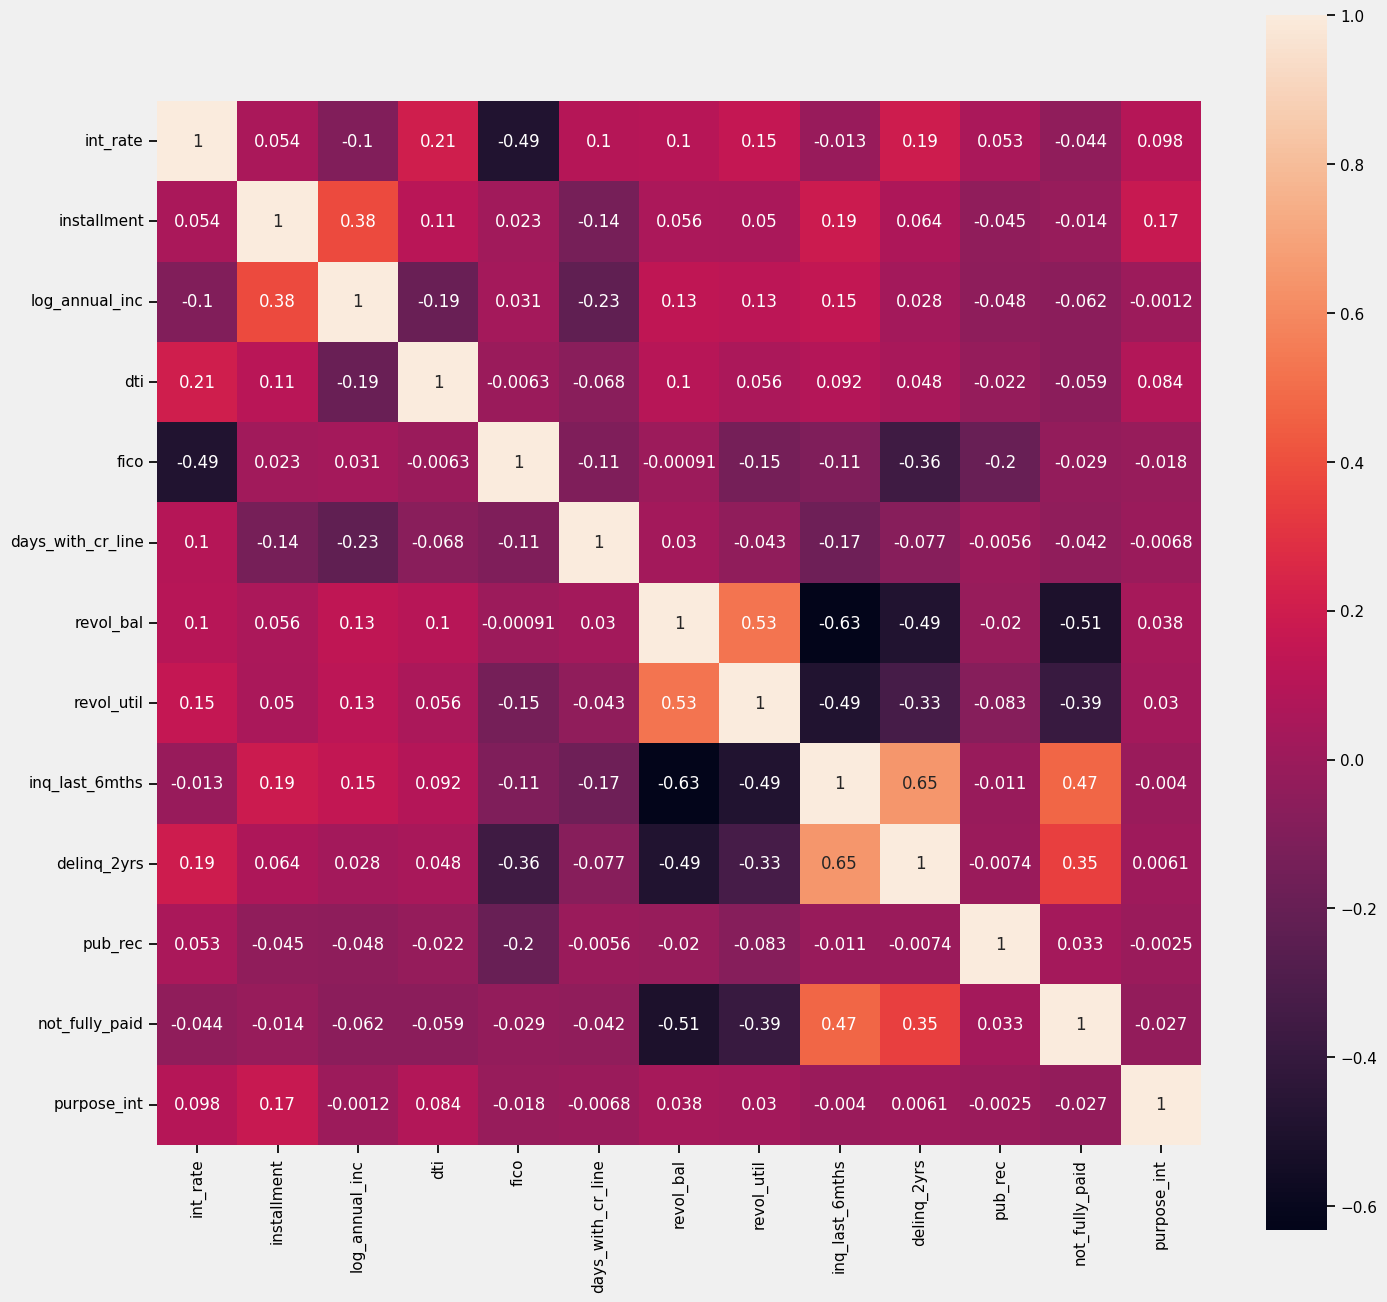

In [ ]:
corr_matrix = df_loan._get_numeric_data().sample(frac=1).corr('spearman')

# Plot the heatmap of Correlation
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, vmax=1, annot=True, square=True);
plt.show()

**Observation:** Due to the cor rate is not high >> keep all columns.

## Scale data

In [ ]:
input_field=df_loan.drop(columns=["not_fully_paid"]).columns.values
X = df_loan[input_field]
y = df_loan["not_fully_paid"]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X[input_field])
X[input_field] = scaler.transform(X[input_field])

<ipython-input-18-4b2f9e14156b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[input_field] = scaler.transform(X[input_field])


In [ ]:
X.describe()

,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,purpose_int
count,36920.000000,36920.000000,36920.000000,36920.000000,36920.000000,36920.000000,36920.000000,36920.000000,36920.000000,36920.000000,36920.00000,36920.000000
mean,0.285822,0.262443,0.009173,0.019935,0.264222,0.747111,0.010437,0.012253,0.017658,0.024378,0.02370,0.528602
std,0.191573,0.174354,0.009845,0.017427,0.198314,0.137600,0.030186,0.028899,0.030008,0.028964,0.06582,0.499188
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.125490,0.132938,0.005376,0.011942,0.107527,0.681464,0.000000,0.000000,0.000003,0.000933,0.00000,0.000000
50%,0.250980,0.214674,0.007527,0.018298,0.215054,0.774825,0.000002,0.000000,0.009606,0.020200,0.00000,1.000000
75%,0.403922,0.363020,0.010753,0.025516,0.376344,0.832603,0.003615,0.016435,0.023171,0.038000,0.00000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


#6.Modelling

## Train-test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Handle imbalanced lable

In [ ]:
# Checking balance lable before handling:
y_train.value_counts()

1    21484
0     8052
Name: not_fully_paid, dtype: int64

In [ ]:
# Upsampling by SMOTE:
sm = SMOTE(k_neighbors=5)
X_train_resample, y_train_resample = sm.fit_resample(X_train,y_train)

In [ ]:
# Checking balance lable after handling:
y_train_resample.value_counts()

1    21484
0    21484
Name: not_fully_paid, dtype: int64

## Logistic Regression with scikit-learn

In [ ]:
# Importing libraries:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

In [ ]:
# Logistic Regression
model_log = LogisticRegression()
model_log.fit(X_train_resample, y_train_resample)
y_pred = model_log.predict(X_test)

              precision    recall  f1-score   support

           0       0.69      0.67      0.68      2093
           1       0.87      0.88      0.88      5291

    accuracy                           0.82      7384
   macro avg       0.78      0.78      0.78      7384
weighted avg       0.82      0.82      0.82      7384



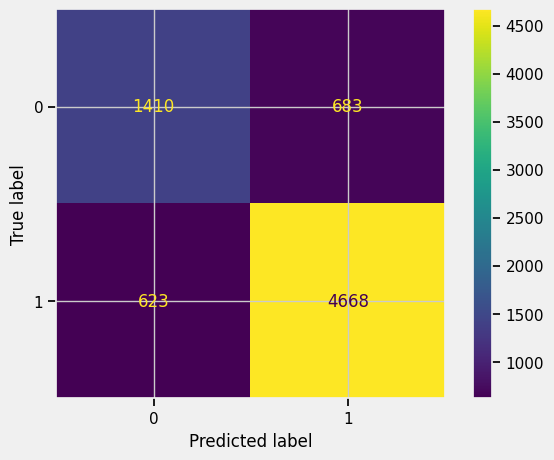

In [ ]:
# Print-out:
print(classification_report( y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model_log, X_test, y_test)

From classification report:

- **Precision:** Out of all the borrowers that the model **predicted** would repay, 87% actually did.

- **Recall:** Out of all the borrowers that **actually** did repay, the model predicted this outcome correctly for 88% of those borrowers.
- **F1 Score:** This value is calculated as:

              F1 Score: 2 * (Precision * Recall) / (Precision + Recall)

=> Since this value is very close to 1, it tells us that the model does a good job of predicting whether borrowers will repay loan or not.

- **Support:** These values simply tell us how many borrowers belonged to each class in the test dataset. We can see that among the borrowers in the test dataset.

## Comparing with other model: XGBoost

              precision    recall  f1-score   support

           0       0.73      0.65      0.69      2093
           1       0.87      0.91      0.89      5291

    accuracy                           0.83      7384
   macro avg       0.80      0.78      0.79      7384
weighted avg       0.83      0.83      0.83      7384



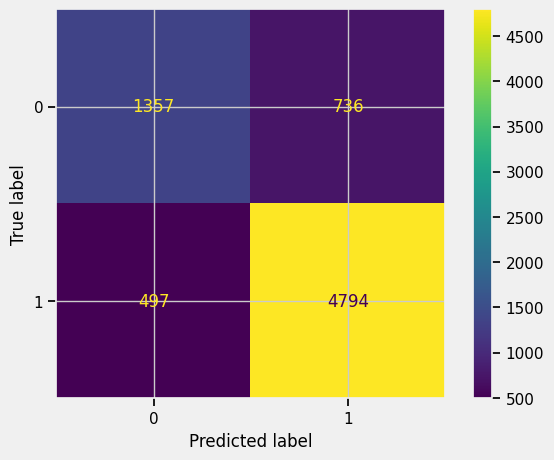

In [ ]:
# Importing libraries:
import xgboost as xgb

# XGBoost:
model_xgb = xgb.XGBClassifier(random_state=42, n_estimators = 200)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)

# Print out:
print(classification_report( y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model_xgb, X_test, y_test)

##Comparing with other model: Random Forest

              precision    recall  f1-score   support

           0       0.74      0.70      0.72      2093
           1       0.88      0.90      0.89      5291

    accuracy                           0.85      7384
   macro avg       0.81      0.80      0.81      7384
weighted avg       0.84      0.85      0.84      7384



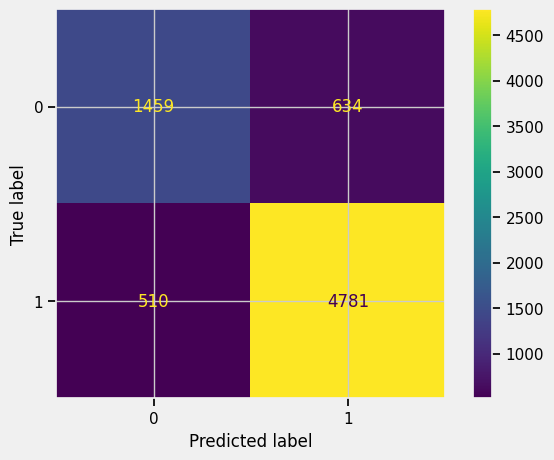

In [ ]:
# Importing libraries:
from sklearn.ensemble import RandomForestClassifier

# Random Forest:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

# Print out:
print(classification_report( y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(random_forest, X_test, y_test)

**Observations:**
- All three models show good performance with high precision, recall, and F1-scores for both classes.
- Random Forest has the highest overall accuracy at 0.85, followed by XGBoost at 0.83, and Logistic Regression at 0.82.
- Random Forest exhibits the best balance between precision and recall, making it a strong choice for this task.
- XGBoost also performs well, with high precision for class 1, making it a competitive option.
- Logistic Regression, while not far behind, has slightly lower accuracy and F1-scores.


In summary, all three models are effective, but Random Forest and XGBoost appear to be the top performers for this classification task, with Random Forest having a slight edge in terms of accuracy and balance between precision and recall.

#7.Conclusion

**Attributes with Significant Impact:**

While all the attributes in the dataset play a role in predicting credit payment behavior, some have a more pronounced influence. In the analysis, it was observed that the most influential attributes include credit policy, interest rate, annual income, FICO score, and purpose of the loan. Financial institutions should pay particular attention to these factors when making lending decisions.

**Recommendations for Financial Institutions:**
1. Feature Importance Analysis: Regularly conduct feature importance analysis to identify the key attributes influencing credit payment behavior. Focus your risk assessment and lending decisions on these factors.

2. Continuous Model Monitoring: Continuously monitor the performance of your machine learning models to ensure they remain effective. Retrain and recalibrate models as needed to adapt to evolving borrower behaviors.

3. Embrace Data Quality: Maintain the accuracy and reliability of your dataset, particularly for essential attributes such as annual income and credit scores. High-quality data leads to better predictions.

4. Customized Lending Policies: Tailor your lending policies and interest rates to different risk profiles, allowing for more precise decision-making and risk management.

5. Automate Decision Processes: Automate loan approval and denial decisions based on machine learning model outputs. This speeds up the lending process and reduces human bias.

These recommendations will help financial institutions maximize the benefits of machine learning in credit prepayment prediction while effectively managing risks and increasing operational efficiency.

**THANK YOU FOR LISTENING!**